# Sequence Models

Using data from yahoo finance, create a RNN, LSTM, and GRU to give predicitons of closing prices for Nividia stock.

Compare each model with each other to see which does better in making predictions. 

Build a multi-variable LSTM with the same Nividia stock data from yahoo finance and see how well it performs.

In [1]:
import yfinance as yf

nvidia_data = yf.Ticker("NVDA")

In [2]:
nvidia_price_df = nvidia_data.history(period='max')[['Close']]

In [3]:
nvidia_price_df

,Close
Date,
1999-01-22 00:00:00-05:00,0.037605
1999-01-25 00:00:00-05:00,0.041545
1999-01-26 00:00:00-05:00,0.038321
1999-01-27 00:00:00-05:00,0.038202
1999-01-28 00:00:00-05:00,0.038082
...,...
2025-12-01 00:00:00-05:00,179.909988
2025-12-02 00:00:00-05:00,181.449905
2025-12-03 00:00:00-05:00,179.580002


In [4]:
import pandas as pd
nvidia_price_df.to_csv('data/nvidia_stock_price_max_hist.csv')

In [5]:
nvidia_price_df.describe()

,Close
count,6761.000000
mean,13.141670
std,34.654923
min,0.031278
25%,0.262215
50%,0.447219
75%,5.475042
max,207.028473


In [6]:
nvidia_close = nvidia_price_df[['Close']]

array([[<Axes: title={'center': 'Close'}>]], dtype=object)

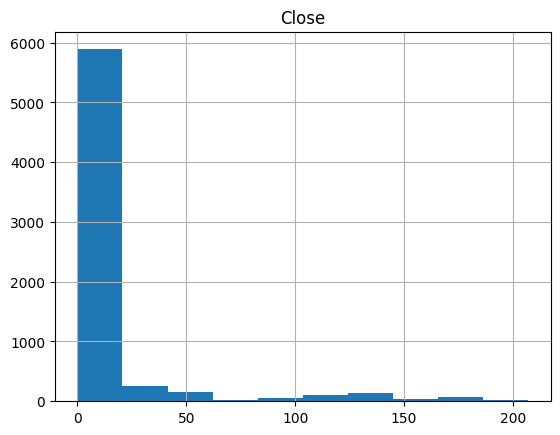

In [7]:
import matplotlib.pyplot as plt
nvidia_close.hist()

<Axes: xlabel='Date'>

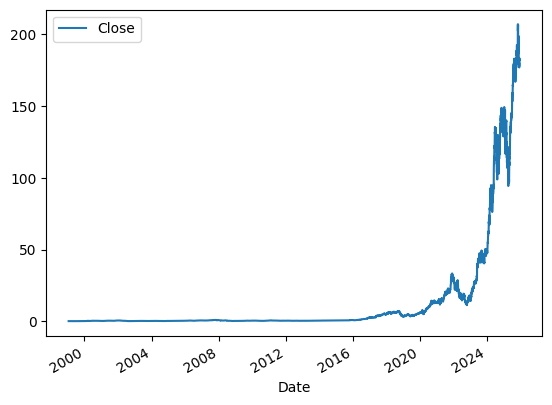

In [8]:
nvidia_close.plot()

In [9]:
nvidia_close_norm = (nvidia_close - nvidia_close.min()) / (nvidia_close.max() - nvidia_close.min())

<Axes: xlabel='Date'>

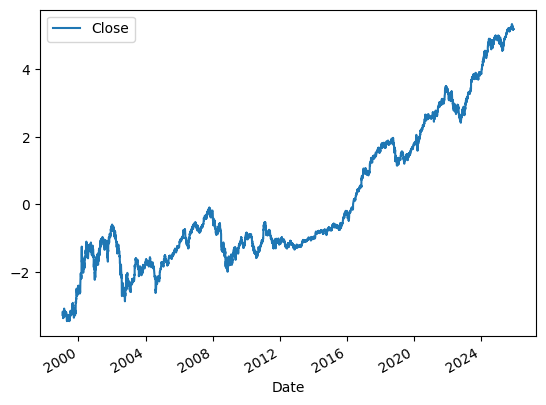

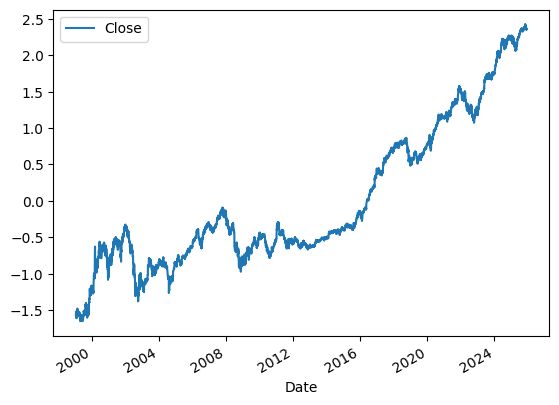

In [10]:
import numpy as np
nv_log = np.log(nvidia_close)
nv_log.plot()
nv = (nv_log - nv_log.mean()) / nv_log.std()
nv.plot()

In [11]:
np.log(0.2)

np.float64(-1.6094379124341003)

<Axes: xlabel='Date'>

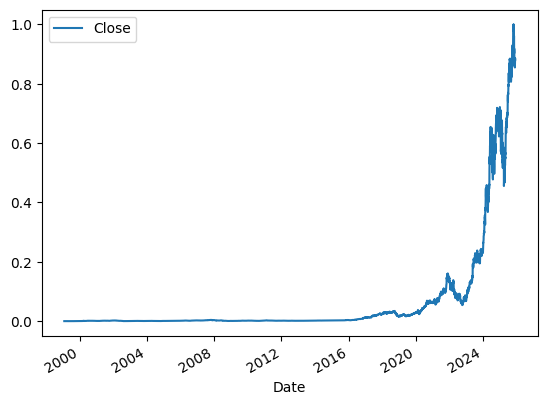

In [12]:
nvidia_close_norm.plot()

In [ ]:
from data_handler import (
    extract_stock_close_price,
    log_transformation,
    standardization,
    split_train_test_set,
    sliding_window,
    split_feature_targets,
    split_train_val_data,
)



file = 'data/nvidia_stock_price_max_hist.csv'
close_raw = extract_stock_close_price("NVDA", "max", file, "Close")

test_ratio = 0.20
train_raw, test_raw = split_train_test_set(close_raw, test_ratio)

train_log = log_transformation(train_raw)
train_clean, train_log_mean, train_log_std = standardization(train_log)

test_log = log_transformation(test_raw)
test_clean = (test_log - train_log_mean) / train_log_std


In [6]:
window_size = 50
window_step = 2
val_ratio = 0.20

training_data_windows = sliding_window(train_clean, window_size, window_step)
train_set, val_set = split_train_val_data(training_data_windows, val_ratio)
X_train, y_train = split_feature_targets(train_set)
X_val, y_val = split_feature_targets(val_set)

In [7]:
test_set = sliding_window(test_clean, window_size, window_step)
X_test, y_test = split_feature_targets(test_set)

In [ ]:
from sequence_model import SimpleRNN
import torch.optim.adam

model = SimpleRNN()

logits = model(X_train, y_train)


In [13]:
print(X_train.shape, y_train.shape)

(2681, 39) (2681, 1)


In [49]:
batch_size = 32
data_size = 2681
for i in range(0,data_size,batch_size):
    print(i, i+batch_size-1)



0 31
32 63
64 95
96 127
128 159
160 191
192 223
224 255
256 287
288 319
320 351
352 383
384 415
416 447
448 479
480 511
512 543
544 575
576 607
608 639
640 671
672 703
704 735
736 767
768 799
800 831
832 863
864 895
896 927
928 959
960 991
992 1023
1024 1055
1056 1087
1088 1119
1120 1151
1152 1183
1184 1215
1216 1247
1248 1279
1280 1311
1312 1343
1344 1375
1376 1407
1408 1439
1440 1471
1472 1503
1504 1535
1536 1567
1568 1599
1600 1631
1632 1663
1664 1695
1696 1727
1728 1759
1760 1791
1792 1823
1824 1855
1856 1887
1888 1919
1920 1951
1952 1983
1984 2015
2016 2047
2048 2079
2080 2111
2112 2143
2144 2175
2176 2207
2208 2239
2240 2271
2272 2303
2304 2335
2336 2367
2368 2399
2400 2431
2432 2463
2464 2495
2496 2527
2528 2559
2560 2591
2592 2623
2624 2655
2656 2687


In [46]:
import numpy as np
idx1 = [*range(0,data_size,batch_size)]
idx2 = [idx1 + (batch_size-1)]
print(idx2)


TypeError: can only concatenate list (not "int") to list

In [ ]:
X_batch = np.empty((data_size,39))
for i in range(-(-data_size//batch_size)):
    start = idx1[i]
    end = idx2[i]
    X_batch = X_train[start:end,:]
    y_batch = y_train[start:end,:]

In [148]:
idx = np.arange(0,data_size,batch_size)
X_batches = np.array_split(X_train, idx[1:])
y_batches = np.array_split(y_train, idx[1:])

num_batches = len(idx)
for i in range(num_batches):
    X = X_batches[i]
    y = y_batches[i]



In [147]:
len(idx)

84